<a href="https://colab.research.google.com/github/sairamnimmadi/git-session/blob/master/Amazon_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/train.ft.txt', error_bad_lines=False,sep="\n")
print(data.head())

  __label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0  __label__2 The best soundtrack ever to anythin...                                                                                                                                                                                                                                                                                                                                                                                                   
1  __label__2 Amazing!: This soundtrack is my fav...                                                                    

In [2]:
import pandas as pd
data1 = pd.read_csv('/content/test.ft.txt',error_bad_lines=False,sep="\n")
print(data1.head())

  __label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"
0  __label__2 One of the best game music soundtra...                                                                                                                                                                                                                                                                                                                                                                                                                 

In [3]:
import pandas as pd
with open('test.ft.txt', 'r') as reader:
  label=[]
  reviews=[]
  for line in reader.readlines():
    label.append(line[9])
    reviews.append(line[10:])
temp={'labels':label,'Reviews':reviews}
test = pd.DataFrame(temp)
print(test.head())

  labels                                            Reviews
0      2   Great CD: My lovely Pat has one of the GREAT ...
1      2   One of the best game music soundtracks - for ...
2      1   Batteries died within a year ...: I bought th...
3      2   works fine, but Maha Energy is better: Check ...
4      2   Great for the non-audiophile: Reviewed quite ...


In [4]:
import pandas as pd
with open('train.ft.txt', 'r') as reader:
  label2=[]
  reviews2=[]
  for line in reader.readlines():
    label2.append(line[9])
    reviews2.append(line[10:])
temp2={'labels':label2,'Reviews':reviews2}
test2 = pd.DataFrame(temp2)
print(test2.head())

  labels                                            Reviews
0      2   Stuning even for the non-gamer: This sound tr...
1      2   The best soundtrack ever to anything.: I'm re...
2      2   Amazing!: This soundtrack is my favorite musi...
3      2   Excellent Soundtrack: I truly like this sound...
4      2   Remember, Pull Your Jaw Off The Floor After H...


In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
wordnet_lemmatizer = WordNetLemmatizer()

punctuations="?:!.,;"
required_words = []
for line in test.Reviews:
  words_in_line = nltk.word_tokenize(line)
  for word in words_in_line:
    if word in punctuations:
        words_in_line.remove(word)
  required_words.append(words_in_line)
#Punctuations removed

for sentence_index in range(len(required_words)):
  for word_index in range(len(required_words[sentence_index])):
      required_words[sentence_index][word_index] = wordnet_lemmatizer.lemmatize(required_words[sentence_index][word_index], pos="v")


In [0]:
for i in range(len(required_words)):
    required_words[i] = ' '.join(required_words[i])    
test['Reviews'] = required_words


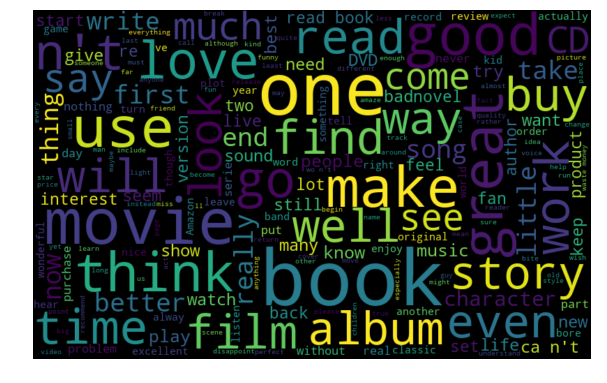

In [8]:
all_words = ' '.join([text for text in test['Reviews']]) 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
wordnet_lemmatizer = WordNetLemmatizer()

punctuations="?:!.,;"
required_words = []
for line in test2.Reviews:
  words_in_line = nltk.word_tokenize(line)
  for word in words_in_line:
    if word in punctuations:
        words_in_line.remove(word)
  required_words.append(words_in_line)
#Punctuations removed

for sentence_index in range(len(required_words)):
  for word_index in range(len(required_words[sentence_index])):
      required_words[sentence_index][word_index] = wordnet_lemmatizer.lemmatize(required_words[sentence_index][word_index], pos="v")


In [0]:
for i in range(len(required_words)):
    required_words[i] = ' '.join(required_words[i])    
test2['Reviews'] = required_words


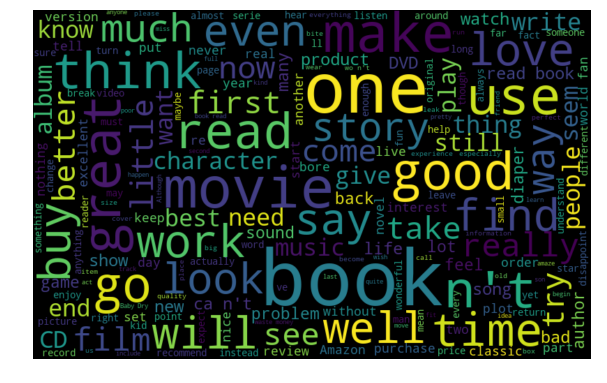

In [11]:
all_words = ' '.join([text for text in test2['Reviews']]) 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, stop_words='english')
tfv_matrix = tfv.fit_transform(test2['Reviews'])
print(tfv_matrix)

  (0, 6115)	0.12659547359949103
  (0, 1651)	0.14191541495308027
  (0, 5237)	0.16134371679857037
  (0, 9574)	0.2393144314280181
  (0, 4702)	0.21644781842913607
  (0, 4629)	0.24268734706420442
  (0, 9799)	0.1692357014550074
  (0, 4274)	0.26253678421328336
  (0, 2568)	0.21005772694314667
  (0, 944)	0.12249339894080188
  (0, 1155)	0.0951763024449535
  (0, 2563)	0.18140294744668914
  (0, 1915)	0.25092560782065076
  (0, 7728)	0.2206274674291505
  (0, 6844)	0.22336558382762411
  (0, 4371)	0.39327834847512055
  (0, 4814)	0.15550231844195303
  (0, 7538)	0.1040223166022567
  (0, 8379)	0.18498720488742448
  (0, 6617)	0.13539833130979897
  (0, 7382)	0.17710915874892602
  (0, 1089)	0.13880294222817988
  (0, 10523)	0.13660608133394964
  (0, 9581)	0.11614640254878368
  (0, 4375)	0.2561466927272939
  :	:
  (14101, 4843)	0.10540729776204227
  (14101, 11416)	0.10660603243030754
  (14101, 8617)	0.10256673833163686
  (14101, 9358)	0.12428582219942562
  (14101, 516)	0.17370761738559617
  (14101, 9849)	0.12

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
import numpy as np
lreg = LogisticRegression() 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(test2['Reviews']) 
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(tfidf, test2['labels'], random_state=42, test_size=0.3)
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
yvalid=yvalid.to_numpy()
for i in range(len(yvalid)):
  yvalid[i]=int(yvalid[i])
for i in range(len(prediction_int)):
  prediction_int[i]+=1
# print(len(prediction_int))
# print(len(yvalid))
c=0
for i in range(len(yvalid)):
  if(yvalid[i]==prediction_int[i]):
    c+=1
print(c/len(yvalid)*100)

79.57929567478138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
